### Demo Notebook that uses FLAML framework's AutoML feature for task oriented ML models

In [25]:
!pip install flaml openml
!pip install --upgrade pandas "dask[complete]"

389.85s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
395.84s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


** NOTE : On M1 Mac, to install automl, need to install libomp using `brew install libomp`

In [26]:
!pip install "flaml[automl]" 

405.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


2. Classification Example

Download **[Telco Churn](https://www.openml.org/search?type=data&sort=runs&id=42178&status=active)** Dataset from OpenML datasets. The task is to predict if a customer is going to churn.

In [31]:
from flaml.automl.data import load_openml_dataset
from sklearn.model_selection import train_test_split
import pandas as pd
try:
    #X_train, X_test, y_train, y_test = load_openml_dataset(dataset_id=42178, data_dir='./')
    data = pd.read_csv('./datasets/german_credit_eval.csv')

    # Separate outcome
    y = data['outcome']
    x = data.drop('outcome',axis=1)

    # Bring in test and training data
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

    # Create an encoder
    cat_columns = [
        'checkingstatus',
        'history',
        'purpose',
        'savings',
        'employ',
        'status',
        'others',
        'property',
        'age',
        'otherplans',
        'housing',
        'job',
        'telephone',
        'foreign'
    ]
    encoder = CatEncoder(cat_columns, x, normalize=True)
    encoded_x_train = encoder(x_train.values)
    encoded_x_test = encoder(x_test.values)
except (Exception):
    print("Exception raised, executing except block...")
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from pandas import DataFrame

    X, y = make_classification(n_samples=539383, n_features=7)
    X = DataFrame(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y)

Exception raised, executing except block...


In [33]:
print(len(X_train), len(y_train))

404537 404537


3. Run FLAML

In [34]:
''' import AutoML class from flaml package '''
from flaml import AutoML
automl = AutoML()

In [35]:
settings = {
    "time_budget": 600,  # total running time in seconds
    "metric": 'accuracy', 
                        # check the documentation for options of metrics (https://microsoft.github.io/FLAML/docs/Use-Cases/Task-Oriented-AutoML#optimization-metric)
    "task": 'classification',  # task type
    "log_file_name": 'automl-german-credit.log',  # flaml log file
    "seed": 7654321,    # random seed
}

In [36]:
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.logger: 12-06 13:28:53] {1679} INFO - task = classification
[flaml.automl.logger: 12-06 13:28:53] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 12-06 13:28:53] {1788} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 12-06 13:28:53] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 12-06 13:28:53] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 12-06 13:28:53] {2344} INFO - Estimated sufficient time budget=11001s. Estimated necessary time budget=254s.
[flaml.automl.logger: 12-06 13:28:53] {2391} INFO -  at 0.6s,	estimator lgbm's best error=0.0842,	best estimator lgbm's best error=0.0842
[flaml.automl.logger: 12-06 13:28:53] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 12-06 13:28:53] {2391} INFO -  at 0.6s,	estimator lgbm's best error=0.0614,	best estimator lgbm's best error=0.0614
[flaml.automl.logger: 12-06

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


[flaml.automl.logger: 12-06 13:28:54] {2391} INFO -  at 1.5s,	estimator rf's best error=0.0801,	best estimator lgbm's best error=0.0529
[flaml.automl.logger: 12-06 13:28:54] {2218} INFO - iteration 14, current learner rf
[flaml.automl.logger: 12-06 13:28:54] {2391} INFO -  at 1.5s,	estimator rf's best error=0.0801,	best estimator lgbm's best error=0.0529
[flaml.automl.logger: 12-06 13:28:54] {2218} INFO - iteration 15, current learner extra_tree
[flaml.automl.logger: 12-06 13:28:54] {2391} INFO -  at 1.6s,	estimator extra_tree's best error=0.0802,	best estimator lgbm's best error=0.0529
[flaml.automl.logger: 12-06 13:28:54] {2218} INFO - iteration 16, current learner rf
[flaml.automl.logger: 12-06 13:28:54] {2391} INFO -  at 1.8s,	estimator rf's best error=0.0801,	best estimator lgbm's best error=0.0529
[flaml.automl.logger: 12-06 13:28:54] {2218} INFO - iteration 17, current learner extra_tree
[flaml.automl.logger: 12-06 13:28:54] {2391} INFO -  at 1.9s,	estimator extra_tree's best er

/Users/mchutani/softwares/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-06 13:29:19] {2391} INFO -  at 26.5s,	estimator rf's best error=0.0549,	best estimator xgb_limitdepth's best error=0.0507
[flaml.automl.logger: 12-06 13:29:19] {2218} INFO - iteration 113, current learner lrl1
[flaml.automl.logger: 12-06 13:29:19] {2391} INFO -  at 26.6s,	estimator lrl1's best error=0.0968,	best estimator xgb_limitdepth's best error=0.0507
[flaml.automl.logger: 12-06 13:29:19] {2218} INFO - iteration 114, current learner lrl1
[flaml.automl.logger: 12-06 13:29:19] {2391} INFO -  at 26.7s,	estimator lrl1's best error=0.0968,	best estimator xgb_limitdepth's best error=0.0507
[flaml.automl.logger: 12-06 13:29:19] {2218} INFO - iteration 115, current learner lrl1


/Users/mchutani/softwares/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-06 13:29:20] {2391} INFO -  at 27.3s,	estimator lrl1's best error=0.0965,	best estimator xgb_limitdepth's best error=0.0507
[flaml.automl.logger: 12-06 13:29:20] {2218} INFO - iteration 116, current learner lgbm


/Users/mchutani/softwares/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-06 13:29:20] {2391} INFO -  at 27.7s,	estimator lgbm's best error=0.0509,	best estimator xgb_limitdepth's best error=0.0507
[flaml.automl.logger: 12-06 13:29:20] {2218} INFO - iteration 117, current learner lgbm
[flaml.automl.logger: 12-06 13:29:21] {2391} INFO -  at 28.0s,	estimator lgbm's best error=0.0509,	best estimator xgb_limitdepth's best error=0.0507
[flaml.automl.logger: 12-06 13:29:21] {2218} INFO - iteration 118, current learner xgb_limitdepth
[flaml.automl.logger: 12-06 13:29:21] {2391} INFO -  at 28.2s,	estimator xgb_limitdepth's best error=0.0507,	best estimator xgb_limitdepth's best error=0.0507
[flaml.automl.logger: 12-06 13:29:21] {2218} INFO - iteration 119, current learner extra_tree
[flaml.automl.logger: 12-06 13:29:21] {2391} INFO -  at 28.3s,	estimator extra_tree's best error=0.0548,	best estimator xgb_limitdepth's best error=0.0507
[flaml.automl.logger: 12-06 13:29:21] {2218} INFO - iteration 120, current learner lgbm
[flaml.automl.logger

/Users/mchutani/softwares/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-06 13:31:46] {2391} INFO -  at 173.1s,	estimator extra_tree's best error=0.0505,	best estimator xgb_limitdepth's best error=0.0504
[flaml.automl.logger: 12-06 13:31:46] {2218} INFO - iteration 259, current learner xgb_limitdepth
[flaml.automl.logger: 12-06 13:31:47] {2391} INFO -  at 174.3s,	estimator xgb_limitdepth's best error=0.0504,	best estimator xgb_limitdepth's best error=0.0504
[flaml.automl.logger: 12-06 13:31:47] {2218} INFO - iteration 260, current learner xgb_limitdepth
[flaml.automl.logger: 12-06 13:31:48] {2391} INFO -  at 175.2s,	estimator xgb_limitdepth's best error=0.0504,	best estimator xgb_limitdepth's best error=0.0504
[flaml.automl.logger: 12-06 13:31:48] {2218} INFO - iteration 261, current learner xgb_limitdepth
[flaml.automl.logger: 12-06 13:31:48] {2391} INFO -  at 175.8s,	estimator xgb_limitdepth's best error=0.0504,	best estimator xgb_limitdepth's best error=0.0504
[flaml.automl.logger: 12-06 13:31:48] {2218} INFO - iteration 262, cur

/Users/mchutani/softwares/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-06 13:37:12] {2391} INFO -  at 499.1s,	estimator extra_tree's best error=0.0505,	best estimator xgb_limitdepth's best error=0.0504
[flaml.automl.logger: 12-06 13:37:12] {2218} INFO - iteration 374, current learner extra_tree
[flaml.automl.logger: 12-06 13:37:13] {2391} INFO -  at 500.6s,	estimator extra_tree's best error=0.0505,	best estimator xgb_limitdepth's best error=0.0504
[flaml.automl.logger: 12-06 13:37:13] {2218} INFO - iteration 375, current learner lgbm
[flaml.automl.logger: 12-06 13:37:13] {2391} INFO -  at 500.8s,	estimator lgbm's best error=0.0507,	best estimator xgb_limitdepth's best error=0.0504
[flaml.automl.logger: 12-06 13:37:13] {2218} INFO - iteration 376, current learner lgbm
[flaml.automl.logger: 12-06 13:37:14] {2391} INFO -  at 501.1s,	estimator lgbm's best error=0.0507,	best estimator xgb_limitdepth's best error=0.0504
[flaml.automl.logger: 12-06 13:37:14] {2218} INFO - iteration 377, current learner lgbm
[flaml.automl.logger: 12-06 13

In [37]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: xgb_limitdepth
Best hyperparmeter config: {'n_estimators': 55, 'max_depth': 9, 'min_child_weight': 1.419528327419739, 'learning_rate': 0.14385666786838533, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 0.9561055480862446, 'reg_alpha': 0.0009765625, 'reg_lambda': 82.6547137278434}
Best accuracy on validation data: 0.9496
Training duration of best run: 0.7437 s


In [38]:
automl.model.estimator

XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=1.0, colsample_bynode=None,
              colsample_bytree=0.9561055480862446, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.14385666786838533,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1.419528327419739, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=55,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)

In [39]:
'''pickle and save the automl object'''
import pickle
model_pickle = 'automl-german-credit.pkl'
with open(model_pickle, 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)
'''load pickled automl object'''
with open(model_pickle, 'rb') as f:
    automl = pickle.load(f)

In [40]:
'''compute predictions of testing dataset''' 
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl.predict_proba(X_test)[:,1]

Predicted labels [0 1 1 ... 0 0 1]
True labels [0 1 1 ... 0 0 1]


In [41]:
''' compute different metric values on testing dataset'''
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.9482224166827343
roc_auc = 0.9838199798316837
log_loss = 0.146883200578723


In [42]:
from flaml.automl.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 10000, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0, 'FLAML_sample_size': 10000}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0, 'FLAML_sample_size': 10000}}
{'Current Learner': 'lgbm', 'Current Sample': 10000, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 6, 'min_child_samples': 22, 'learning_rate': 0.04361080593265788, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 3.01864773230917, 'FLAML_sample_size': 10000}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 6, 'min_child_samples': 22, 'learning_r

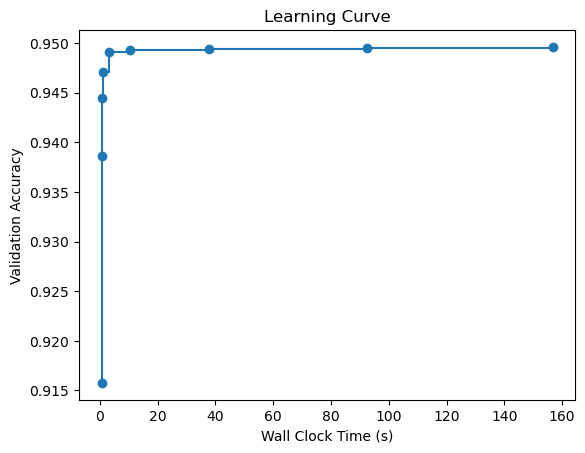

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()